# PyTorch, Conceptos básicos.

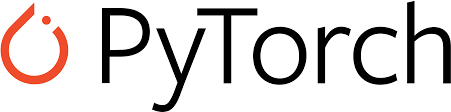

* Es un framework enfocado en *deep learning*. 
* Es el más utilizado en los parpers de IA en general y deep learning en particular.
* Comparte mucha nomenclatura con NumPy.

Hay librerías que extienden las funcionalidades de PyTorch en dominios específicos:

* `torchvision`
* `torchaudio`
* `torchtext`

## Importación de la librería

In [35]:
# %pip install torch

In [36]:
import numpy as np
import torch

In [37]:
torch.__version__

'2.5.1+cpu'

## Tensores

In [38]:
# Creación a partir de una lista

lista = [[1, 2, 3], [4, 5, 6]]

tensor1 = torch.tensor(lista)
tensor1

tensor([[1, 2, 3],
        [4, 5, 6]])

In [39]:
# Creación a partir de un array de numpy

a = np.array([[1, 2, 3], [4, 5, 6]], dtype=np.int64)

tensor2 = torch.from_numpy(a)
tensor2

tensor([[1, 2, 3],
        [4, 5, 6]])

In [40]:
# Dimensiones

tensor1.shape, tensor2.shape

(torch.Size([2, 3]), torch.Size([2, 3]))

In [41]:
# Tipo de dato base

tensor1.dtype, tensor2.dtype

(torch.int64, torch.int64)

In [42]:
# Uso de CPU o GPU

tensor1.device, tensor2.device

(device(type='cpu'), device(type='cpu'))

In [43]:
# Número de elementos

tensor1.numel(), tensor2.numel()

(6, 6)

In [44]:
# Tipo de almacenamiento en memoria

tensor1.layout, tensor2.layout

(torch.strided, torch.strided)

## Operaciones con tensores

Estos tensores, a diferencia de TensorFlow, si son mutables.

In [45]:
# Suma o resta (deben tener las mismas dimensiones)

tensor1 + tensor2, tensor1 - tensor2

(tensor([[ 2,  4,  6],
         [ 8, 10, 12]]),
 tensor([[0, 0, 0],
         [0, 0, 0]]))

In [46]:
# Multiplicación elemento a elemento
tensor1 * tensor2, tensor1 * 100

(tensor([[ 1,  4,  9],
         [16, 25, 36]]),
 tensor([[100, 200, 300],
         [400, 500, 600]]))

In [48]:
# Multiplicación matricial
torch.matmul(tensor1, tensor2.T)

tensor([[14, 32],
        [32, 77]])

In [50]:
# Sumatorio
tensor1.sum(), tensor2.sum()

(tensor(21), tensor(21))

In [52]:
# Máximo, mínimo y media

tensor1.max(), tensor1.min(), tensor1.float().mean()

(tensor(6), tensor(1), tensor(3.5000))

## Creación de redes neuronales

In [53]:
# Importa la librería correspondiente a redes neuronales
import torch.nn as nn

In [54]:
# Creación de una capa lineal para la entrada
input_layer = nn.Linear(in_features=3, out_features=2)

In [55]:
input_data = torch.tensor([[0.783, -0.2038, 0.2291]])
input_data

tensor([[ 0.7830, -0.2038,  0.2291]])

In [57]:
output = input_layer(input_data)
output

tensor([[-0.1094, -0.0023]], grad_fn=<AddmmBackward0>)

In [58]:
# Pesos y sesgos de la capa
input_layer.weight, input_layer.bias

(Parameter containing:
 tensor([[-0.4995, -0.1653, -0.1989],
         [-0.3875,  0.0589,  0.3095]], requires_grad=True),
 Parameter containing:
 tensor([0.2936, 0.2422], requires_grad=True))

In [60]:
# Ejercicio
# Comprueba que operaciones matemáticas se están haciendo en la capa

output_manual = torch.matmul(input_data, input_layer.weight.T) + input_layer.bias
output_manual

tensor([[-0.1094, -0.0023]], grad_fn=<AddBackward0>)

## Red neuronal con varias capas

In [61]:
model = nn.Sequential(
    nn.Linear(10, 6),
    nn.Linear(6, 18),
    nn.Linear(18, 20)
)

In [64]:
input_data = torch.randn(1, 10)
input_data

tensor([[ 0.1091, -1.1388,  1.2262,  0.6285,  0.9155,  0.0601,  0.5424,  0.8952,
         -0.6316, -0.6076]])

In [63]:
# Aplicamos el tensor de entrada a la red neuronal

output_tensor = model(input_data)
output_tensor

tensor([[-0.1207, -0.0743, -0.0674, -0.1834,  0.7042, -0.1684, -0.3769, -0.3614,
          0.7647, -0.5893, -0.3678, -0.7546,  0.4843, -0.1544,  0.5831,  0.1492,
         -0.2590,  0.2143, -0.0215, -0.1611]], grad_fn=<AddmmBackward0>)

## Función de activación

En PyTorch, a diferencia de TensorFlow, las funciones de activación no se suelen especificar como un parámetro en las capas. En su lugar, se definen explícitamente como capas separadas en la red.

In [69]:
tensor3 = torch.randn((4, 6))
tensor3

tensor([[-0.8082, -0.6716, -0.7368,  1.6353,  1.0576, -1.2473],
        [-1.0543,  0.7354,  0.4588,  0.2235,  0.4273,  1.5841],
        [-0.1515, -0.4123, -0.3217,  1.3911,  0.9793,  0.1941],
        [ 0.7246,  0.1325, -0.4546,  0.1099,  0.1897,  0.7584]])

In [71]:
sigmoid = nn.Sigmoid()
sigmoid(tensor3)

tensor([[0.3083, 0.3381, 0.3237, 0.8369, 0.7422, 0.2232],
        [0.2584, 0.6760, 0.6127, 0.5557, 0.6052, 0.8298],
        [0.4622, 0.3984, 0.4203, 0.8008, 0.7270, 0.5484],
        [0.6736, 0.5331, 0.3883, 0.5275, 0.5473, 0.6810]])

In [72]:
relu = nn.ReLU()
relu(tensor3)

tensor([[0.0000, 0.0000, 0.0000, 1.6353, 1.0576, 0.0000],
        [0.0000, 0.7354, 0.4588, 0.2235, 0.4273, 1.5841],
        [0.0000, 0.0000, 0.0000, 1.3911, 0.9793, 0.1941],
        [0.7246, 0.1325, 0.0000, 0.1099, 0.1897, 0.7584]])

In [74]:
softmax = nn.Softmax()
softmax(tensor3)

c:\Users\alfre\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


tensor([[0.0458, 0.0525, 0.0492, 0.5272, 0.2958, 0.0295],
        [0.0298, 0.1787, 0.1355, 0.1071, 0.1313, 0.4175],
        [0.0847, 0.0653, 0.0715, 0.3963, 0.2625, 0.1197],
        [0.2487, 0.1376, 0.0765, 0.1345, 0.1456, 0.2572]])

In [76]:
# Funciones de activación en una red neuronal
model = nn.Sequential(
    nn.Linear(10, 6),
    nn.ReLU(),
    nn.Linear(6, 18),
    nn.ReLU(),
    nn.Linear(18, 20),
    nn.Sigmoid()
)

model

Sequential(
  (0): Linear(in_features=10, out_features=6, bias=True)
  (1): ReLU()
  (2): Linear(in_features=6, out_features=18, bias=True)
  (3): ReLU()
  (4): Linear(in_features=18, out_features=20, bias=True)
  (5): Sigmoid()
)